https://en.wikipedia.org/wiki/Cluster_analysis


https://en.wikipedia.org/wiki/Recommender_system

https://datascience.stackexchange.com/questions/118812/best-algorithms-for-clustering-customers-customer-segmentation

https://link.springer.com/article/10.1007/s44196-024-00568-8

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
Hierarchical

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html#sklearn.cluster.HDBSCAN Heirarchical dbscan

https://stats.stackexchange.com/questions/187595/clustering-with-categorical-and-numeric-data

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import matplotlib.colors as mcolors

from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import f_classif

In [48]:
# load dataset
data = pd.read_csv("cvd_adj.csv")

In [3]:
def create_trainset(df,fract):
    X = df
    randomstate = 42
    numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
                     'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
    
    standardscaler = StandardScaler()
    X_scaled = standardscaler.fit_transform(X[numerical_columns])
    categorical_columns = X.drop(numerical_columns, axis=1)
    full_data = np.hstack([X_scaled, categorical_columns.to_numpy()])
    
    col = list(X.columns.values)
    
    df_fulldata = pd.DataFrame(columns=col,data = full_data)
    sampled_data = df_fulldata.sample(frac=fract, random_state=randomstate)
    
    return sampled_data

In [69]:
X = create_trainset(data,0.20)

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15443 entries, 302051 to 241618
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Height_(cm)                                          15443 non-null  float64
 1   Weight_(kg)                                          15443 non-null  float64
 2   BMI                                                  15443 non-null  float64
 3   Alcohol_Consumption                                  15443 non-null  float64
 4   Fruit_Consumption                                    15443 non-null  float64
 5   Green_Vegetables_Consumption                         15443 non-null  float64
 6   FriedPotato_Consumption                              15443 non-null  float64
 7   General_Health_Fair                                  15443 non-null  float64
 8   General_Health_Good                                  15443 non-nu

In [74]:
tempdata = data.sample(frac=1, random_state=42)
#hela datasetet

In [95]:
hdb = HDBSCAN(min_cluster_size=5, n_jobs=-1)
labels = hdb.fit_predict(tempdata)

array([48, 48, 48, ..., 48, 48, 48])

In [45]:
hdb = joblib.load("hdb_model.pkl")

In [90]:
hdb.get_params()

{'algorithm': 'auto',
 'allow_single_cluster': False,
 'alpha': 1.0,
 'cluster_selection_epsilon': 0.0,
 'cluster_selection_method': 'eom',
 'copy': False,
 'leaf_size': 40,
 'max_cluster_size': None,
 'metric': 'euclidean',
 'metric_params': None,
 'min_cluster_size': 5,
 'min_samples': None,
 'n_jobs': -1,
 'store_centers': None}

In [46]:
labels = hdb.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 52
Estimated number of noise points: 2178


In [47]:
labels = hdb.labels_

In [50]:
score = silhouette_score(tempdata, labels)

In [76]:
tempdata["Cluster"] = labels

In [77]:
tempdata

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster
302051,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,48
59950,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,48
203639,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,48
78768,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,48
216156,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,185.0,84.37,24.54,0.0,30.0,30.0,15.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,48
259178,188.0,81.65,23.11,20.0,15.0,30.0,3.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,48
131932,183.0,88.45,26.45,15.0,8.0,12.0,4.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,48
146867,185.0,181.44,52.77,0.0,8.0,8.0,12.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,48


In [64]:
clustered_data

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,48,-0.282142
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,48,-0.290244
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,48,-0.378820
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,False,False,True,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,48,-0.246962
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,48,-0.376888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,48,-0.298988
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,48,-0.189541
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,48,-0.351445
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,48,-0.234523


For n_clusters = 52 The average silhouette_score is : 0.27489414220778463


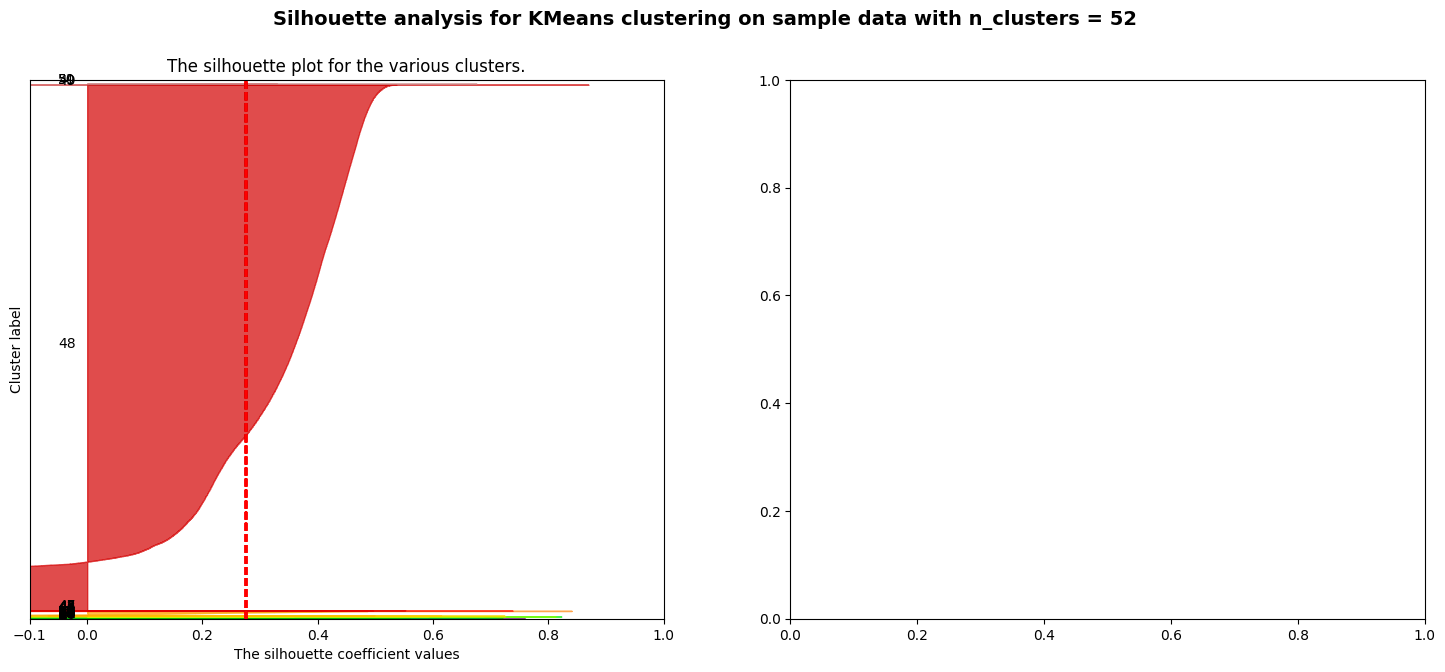

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(tempdata) + (n_clusters_ + 1) * 10])

silhouette_avg = silhouette_score(tempdata, labels)
print(
        "For n_clusters =",
        n_clusters_,
        "The average silhouette_score is :",
        silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tempdata, labels)

y_lower = 10

for i in range(n_clusters_):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters_)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters_,
        fontsize=14,
        fontweight="bold",
    )

In [104]:
joblib.dump(hdb,"hdb_model.pkl",compress=3)

['hdb_model.pkl']

In [107]:
labels

array([48, 48, 48, ..., 48, 48, 48])

In [120]:
pd.set_option('display.max_columns', 500)

In [108]:
clustered_data = pd.DataFrame(tempdata)

In [110]:
clustered_data["Cluster"] = labels

In [116]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

In [121]:
clustered_data.groupby("Cluster").describe()

Height_(cm)                                                       \
              count        mean        std    min     25%    50%     75%   
Cluster                                                                    
-1           2178.0  172.138659  20.083886   91.0  160.00  173.0  185.00   
 0              7.0  174.571429   5.623082  168.0  170.50  175.0  177.50   
 1             17.0  172.294118  14.584944  152.0  160.00  173.0  180.00   
 2              5.0  169.800000   3.033150  168.0  168.00  168.0  170.00   
 3             14.0  170.642857  14.637187  152.0  155.50  174.0  180.00   
 4             10.0  175.100000   8.774331  160.0  175.00  176.5  179.50   
 5             19.0  175.473684  10.611149  157.0  170.00  180.0  181.50   
 6              5.0  163.000000   4.415880  157.0  160.00  165.0  165.00   
 7             10.0  173.800000  10.271860  160.0  165.00  174.0  183.00   
 8              5.0  188.000000   6.041523  180.0  185.00  188.0  191.00   
 9             21.0  174.809524   7.665631  157.0  170.00  175.0  180.00   
 10           103.0  174.165049   8.832979  155.0  168.00  175.0  180.00   
 11            18.0  171.111111   8.764158  155.0  165.00  173.0  178.75   
 12            30.0  163.066667   9.776585  150.0  155.00  160.0  169.50   
 13             5.0  153.800000   3.898718  147.0  155.00  155.0  155.00   
 14             6.0  164.666667   4.501851  157.0  163.50  165.0  167.25   
 15            11.0  174.636364   7.658626  163.0  168.00  175.0  181.50   
 16            51.0  165.509804   6.643410  155.0  160.00  165.0  170.00   
 17             6.0  174.000000   2.683282  170.0  173.00  174.0  175.00   
 18            23.0  171.608696  11.761799  147.0  161.50  175.0  180.00   
 19            12.0  161.416667   6.501165  152.0  158.75  160.0  165.00   
 20            51.0  170.764706   9.947036  152.0  164.00  170.0  176.50   
 21            39.0  171.179487   9.588567  157.0  163.00  173.0  180.00   
 22             5.0  180.200000   3.962323  175.0  178.00  180.0  183.00   
 23            19.0  172.789474  11.683697  152.0  163.00  175.0  182.50   
 24            61.0  168.262295   9.870666  150.0  160.00  170.0  175.00   
 25             5.0  166.200000   6.870226  157.0  163.00  165.0  173.00   
 26            34.0  166.794118   7.846170  155.0  160.00  168.0  173.00   
 27           225.0  171.595556   9.802103  147.0  165.00  173.0  178.00   
 28           103.0  169.242718  10.255048  145.0  163.00  170.0  175.00   
 29            13.0  164.615385   7.041999  157.0  157.00  163.0  170.00   
 30             6.0  184.500000   4.183300  178.0  183.50  185.0  185.00   
 31             7.0  180.000000   3.651484  173.0  179.00  180.0  183.00   
 32             7.0  167.285714   3.683942  160.0  166.50  168.0  170.00   
 33             6.0  178.000000   3.464102  175.0  175.00  177.5  180.00   
 34           173.0  167.791908   8.162773  150.0  163.00  168.0  173.00   
 35             5.0  163.800000   2.949576  160.0  163.00  163.0  165.00   
 36            18.0  165.500000   3.451342  160.0  163.00  165.0  168.00   
 37           293.0  168.593857   9.187668  150.0  163.00  168.0  175.00   
 38             9.0  172.333333   5.408327  163.0  170.00  175.0  175.00   
 39            12.0  170.333333   8.689945  160.0  162.25  169.0  178.00   
 40            28.0  171.250000   9.102808  150.0  167.25  173.0  178.00   
 41          2542.0  169.864673  10.043852  140.0  163.00  170.0  178.00   
 42             6.0  171.666667   2.943920  168.0  169.25  173.0  173.00   
 43           102.0  169.852941  10.545889  152.0  163.00  170.0  178.00   
 44             7.0  162.428571   4.391550  157.0  158.50  165.0  165.00   
 45            30.0  169.466667   5.757953  160.0  165.00  169.0  174.50   
 46           209.0  169.133971   9.577681  147.0  163.00  170.0  175.00   
 47            13.0  167.846154   5.814438  160.0  163.00  170.0  173.00   
 48        301591.0  170.622174  10.562761  115.0  163.0

In [71]:
categorical_columns = data.select_dtypes(include=['bool']).columns.tolist()

In [72]:
categorical_columns

['General_Health_Fair',
 'General_Health_Good',
 'General_Health_Poor',
 'General_Health_Very Good',
 'Checkup_5 or more years ago',
 'Checkup_Within the past 2 years',
 'Checkup_Within the past 5 years',
 'Checkup_Within the past year',
 'Exercise_Yes',
 'Heart_Disease_Yes',
 'Skin_Cancer_Yes',
 'Other_Cancer_Yes',
 'Depression_Yes',
 'Diabetes_No, pre-diabetes or borderline diabetes',
 'Diabetes_Yes',
 'Diabetes_Yes, but female told only during pregnancy',
 'Arthritis_Yes',
 'Sex_Male',
 'Age_Category_25-29',
 'Age_Category_30-34',
 'Age_Category_35-39',
 'Age_Category_40-44',
 'Age_Category_45-49',
 'Age_Category_50-54',
 'Age_Category_55-59',
 'Age_Category_60-64',
 'Age_Category_65-69',
 'Age_Category_70-74',
 'Age_Category_75-79',
 'Age_Category_80+',
 'Smoking_History_Yes']

In [128]:
#range_n_clusters = [3,4,5,6,7,8,9]
#range_n_clusters = [3,4]
range_n_clusters = [3,5,10,15,20,30,35]

models = []

In [126]:
tempdata = data.sample(frac=1, random_state=42)

In [127]:
tempdata

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
302051,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False
59950,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
203639,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
78768,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
216156,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124115,185.0,89.81,26.12,0.0,24.0,0.0,4.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
226195,160.0,61.23,23.91,0.0,12.0,4.0,8.0,False,True,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
222460,165.0,102.06,37.44,0.0,12.0,4.0,1.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
19950,188.0,83.91,23.75,20.0,20.0,4.0,4.0,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True


For n_clusters = 3 The average silhouette_score is : 0.2769182591082346
For n_clusters = 5 The average silhouette_score is : 0.2208308643951698
For n_clusters = 10 The average silhouette_score is : 0.18149435115046322
For n_clusters = 15 The average silhouette_score is : 0.1834377502305454
For n_clusters = 20 The average silhouette_score is : 0.1835651476442208
For n_clusters = 30 The average silhouette_score is : 0.1752718017320101
For n_clusters = 35 The average silhouette_score is : 0.17684896213521592


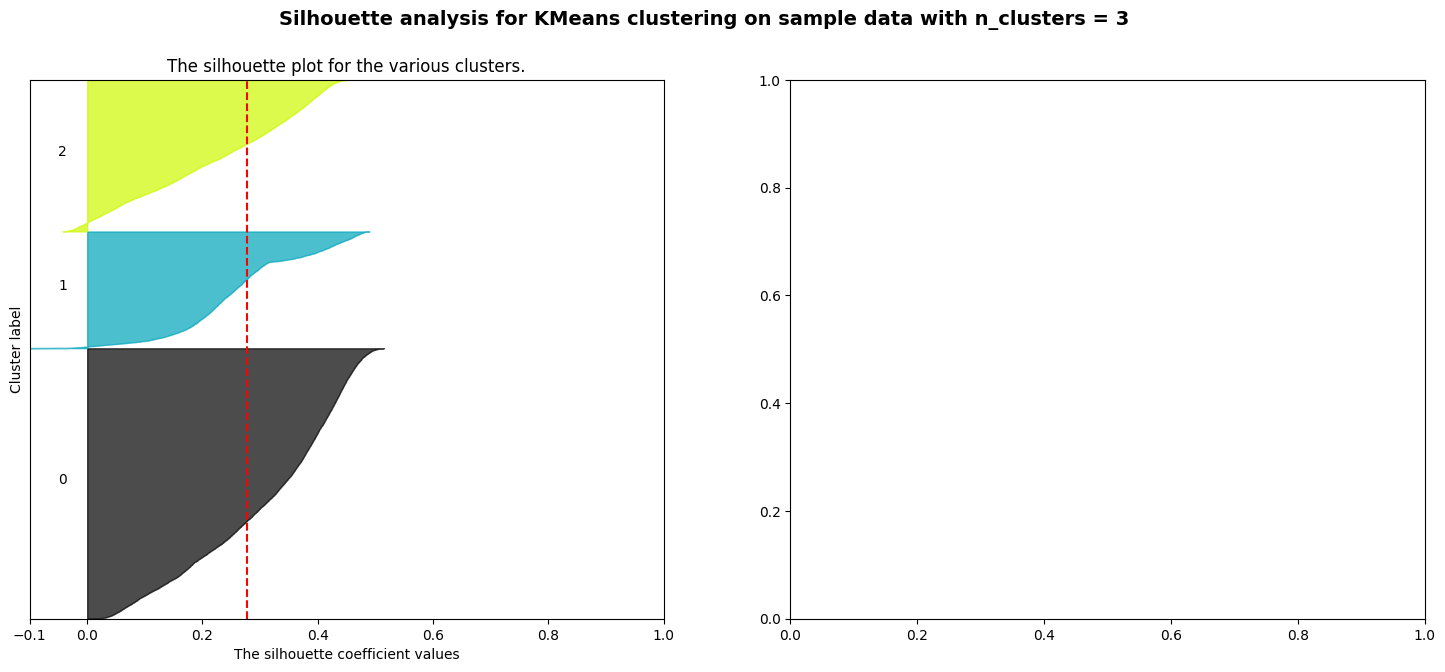

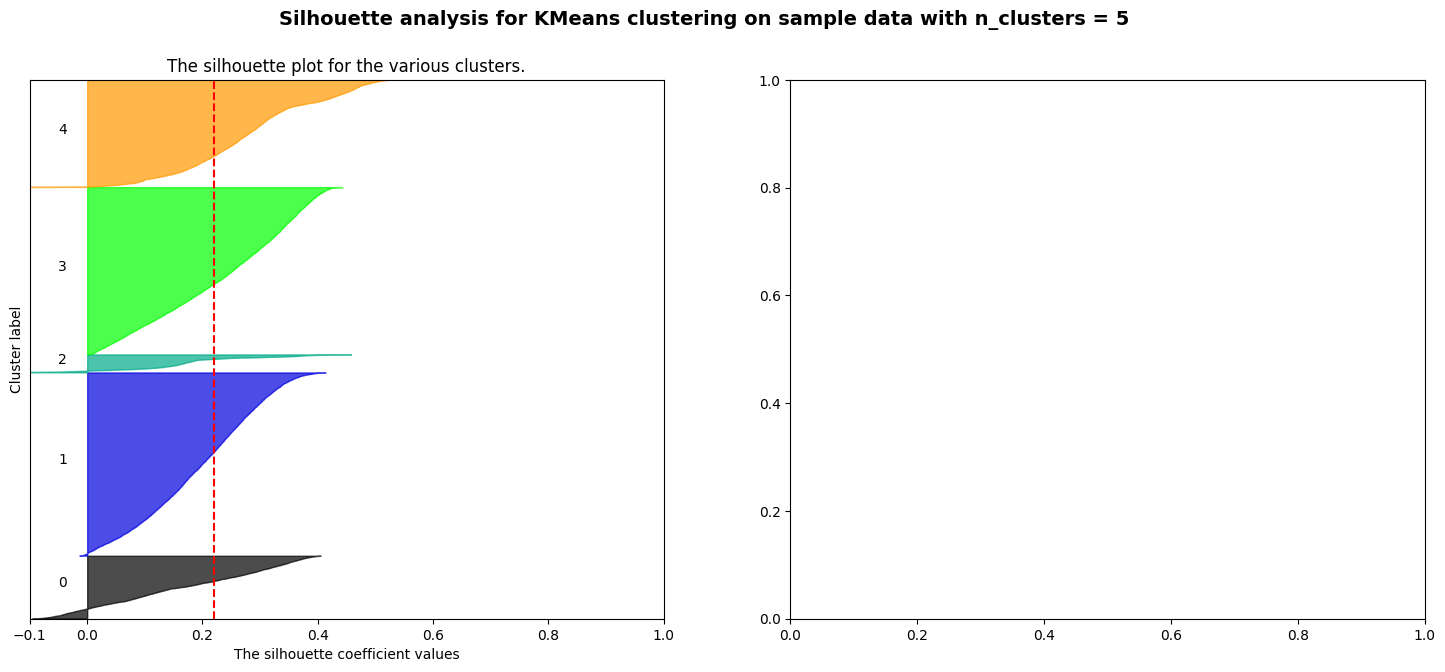

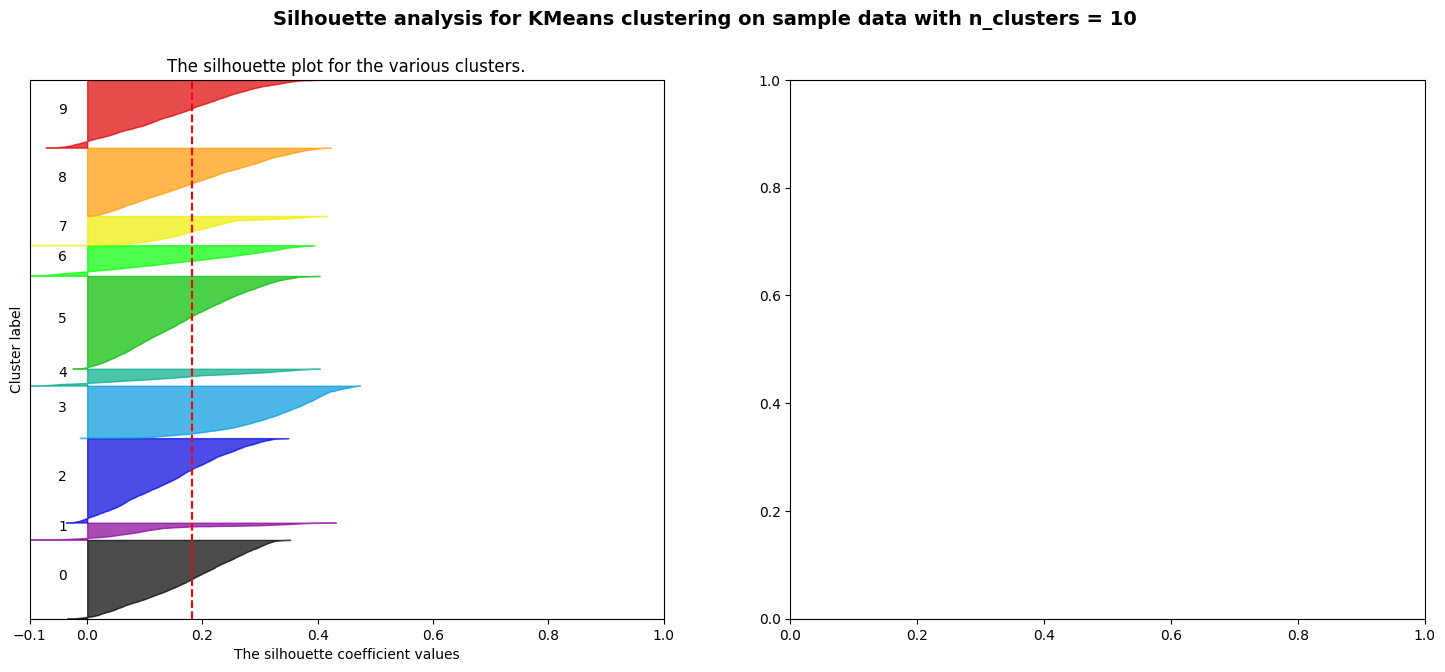

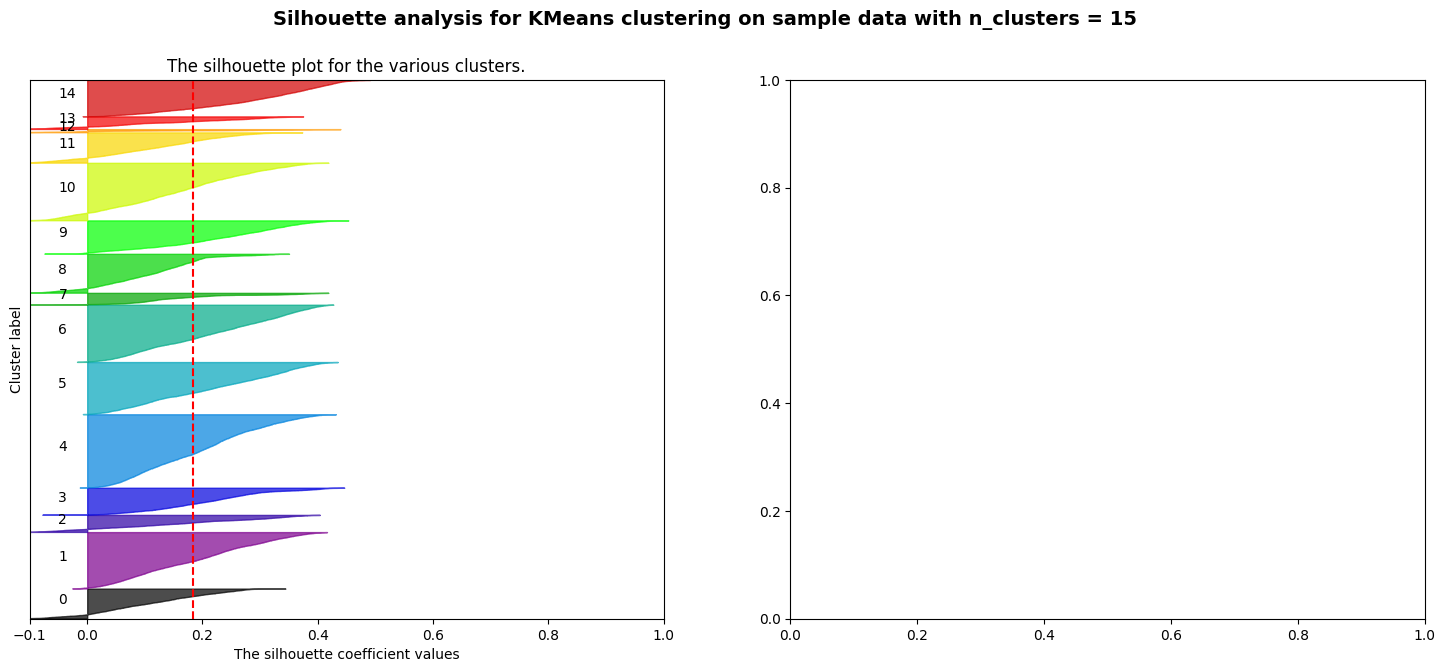

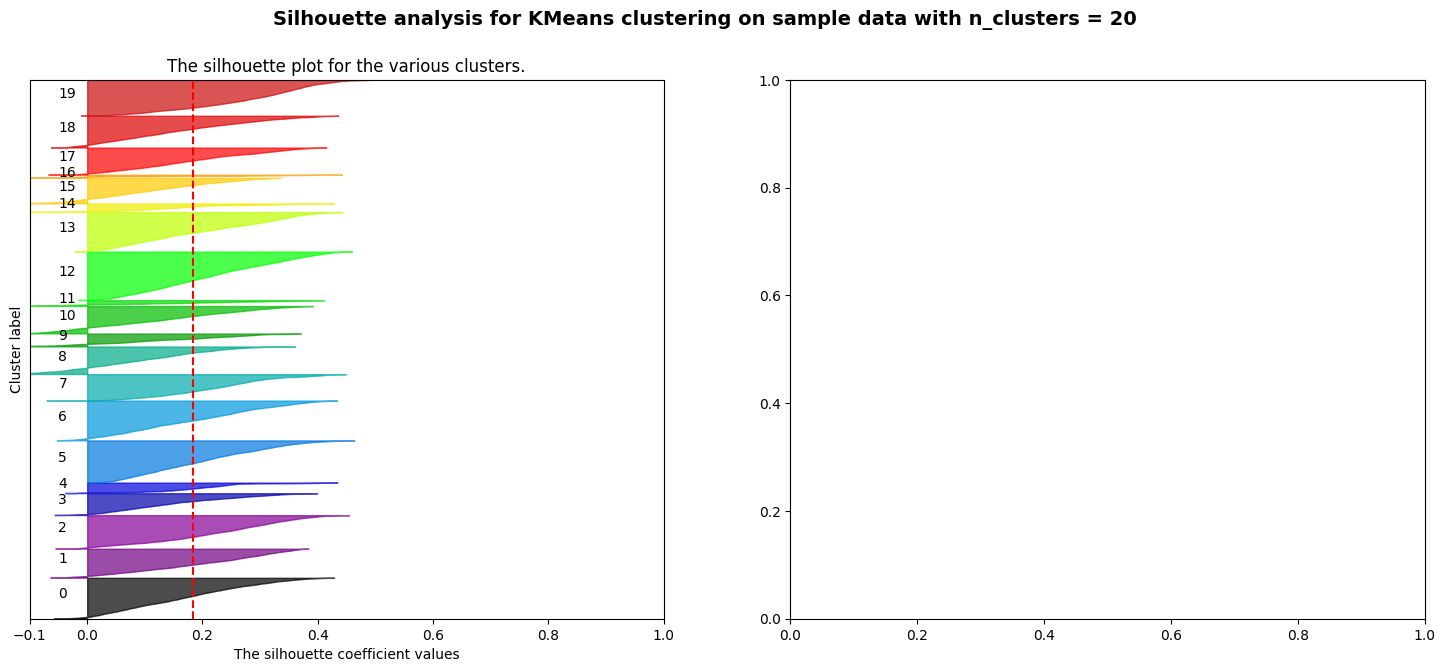

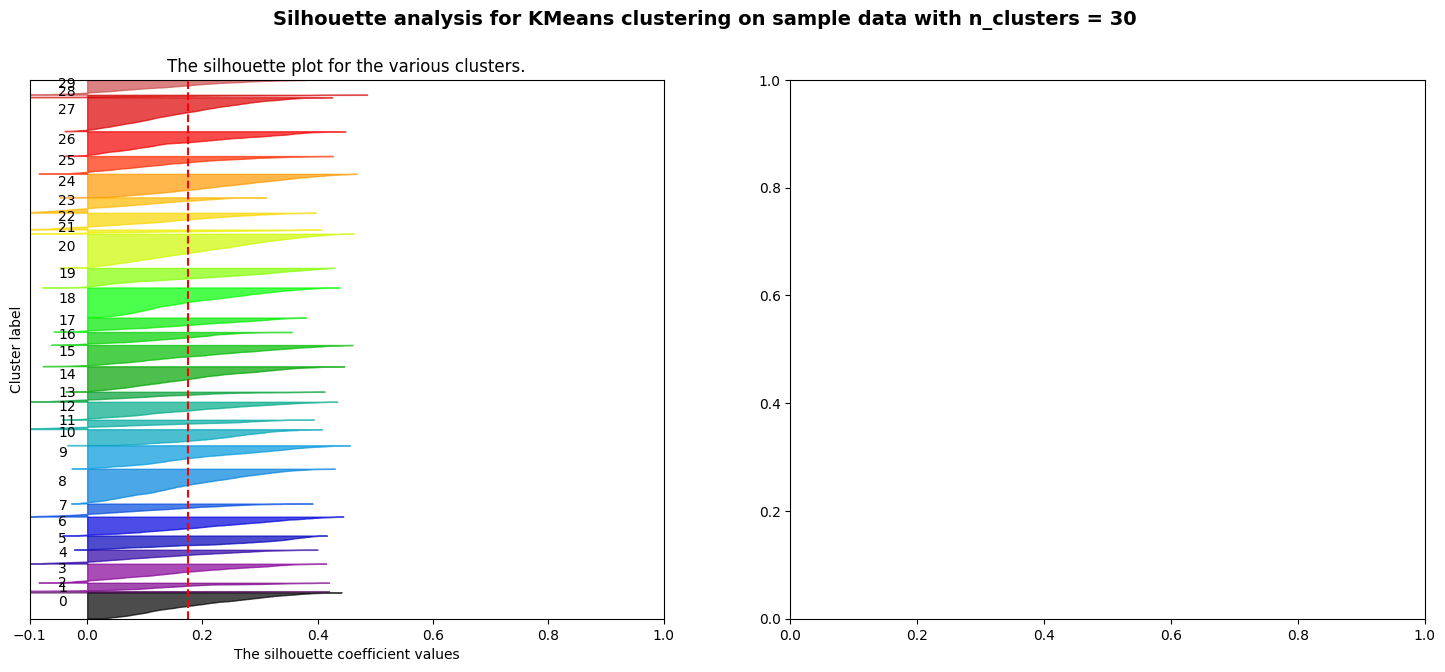

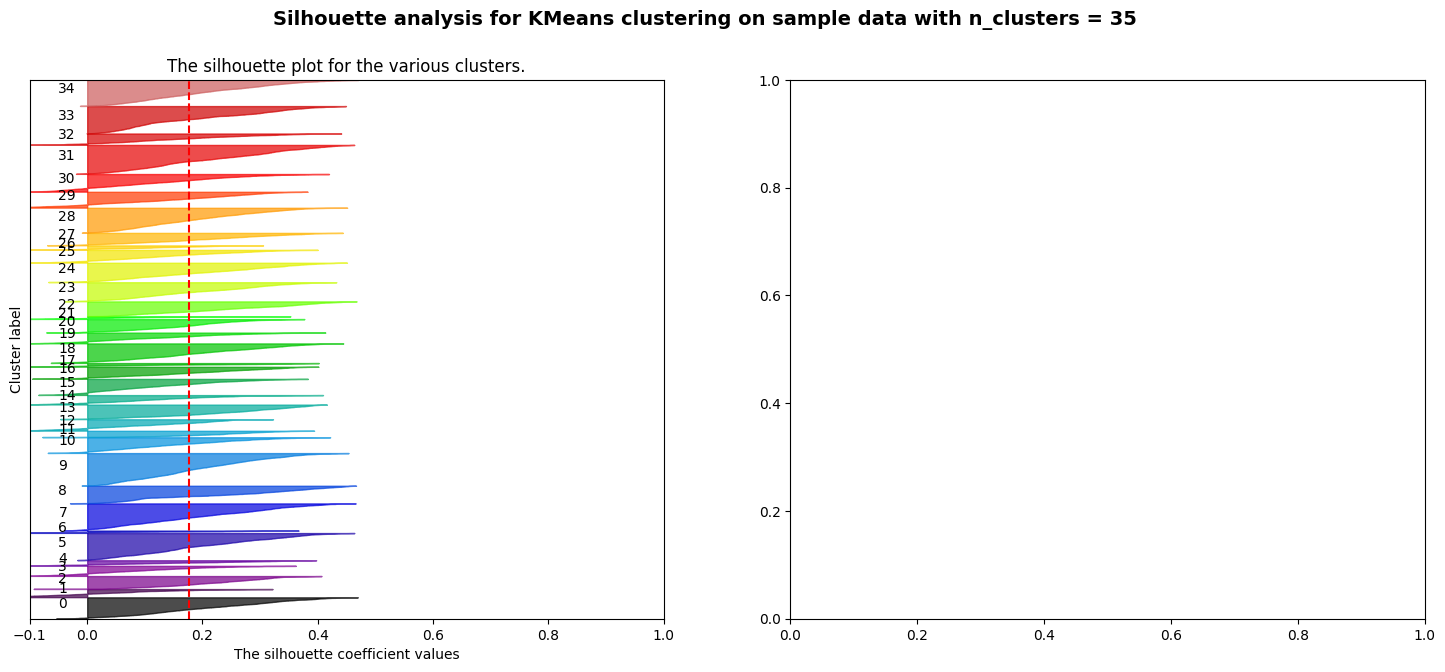

In [129]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tempdata) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KPrototypes(n_clusters = n_clusters, n_jobs = -1)
    cluster_labels = clusterer.fit_predict(tempdata, categorical = [X.columns.get_loc(col) for col in categorical_columns])

    models.append(clusterer)   
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tempdata, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tempdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [143]:

tempdata = data.sample(frac=0.2, random_state=42)

In [144]:
kmeans_models = []

For n_clusters = 3 The average silhouette_score is : 0.27699580322574346
For n_clusters = 5 The average silhouette_score is : 0.21099817982011765
For n_clusters = 10 The average silhouette_score is : 0.18337665687450286
For n_clusters = 15 The average silhouette_score is : 0.17705338532882556
For n_clusters = 20 The average silhouette_score is : 0.17377864699201212
For n_clusters = 30 The average silhouette_score is : 0.17147126751861097
For n_clusters = 35 The average silhouette_score is : 0.18057332208576723


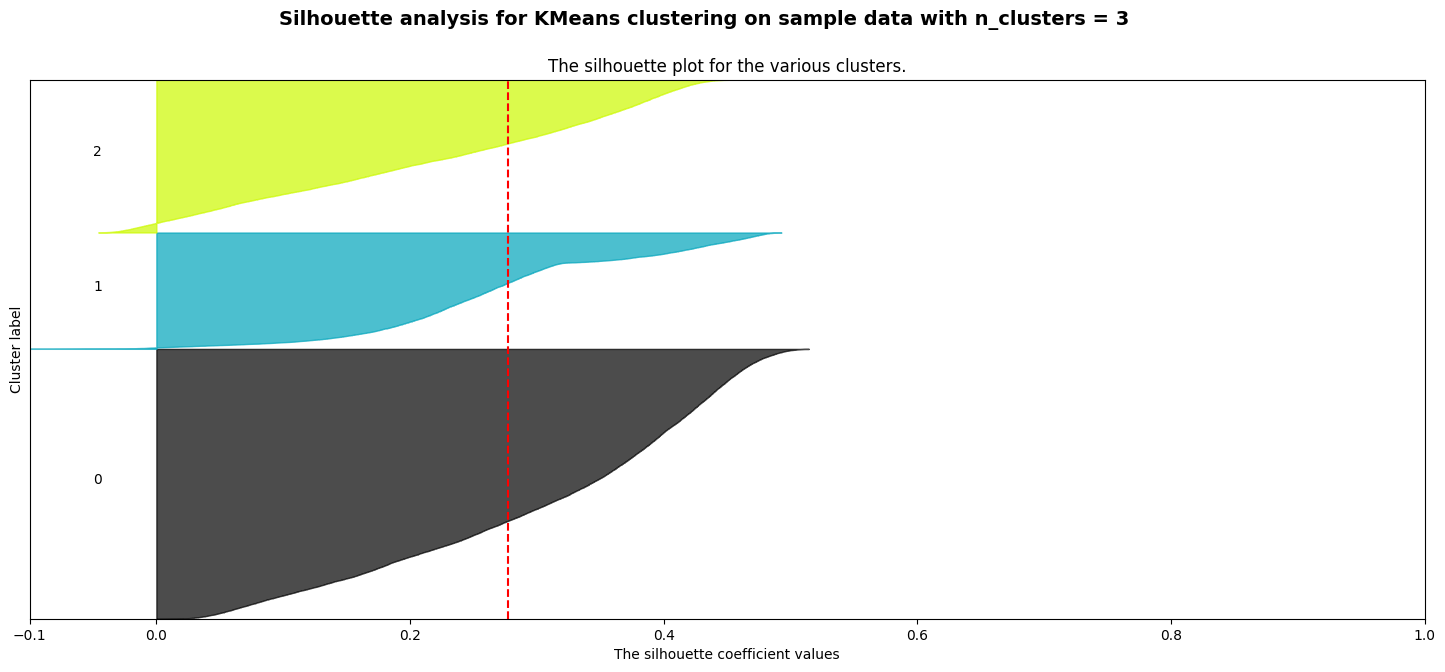

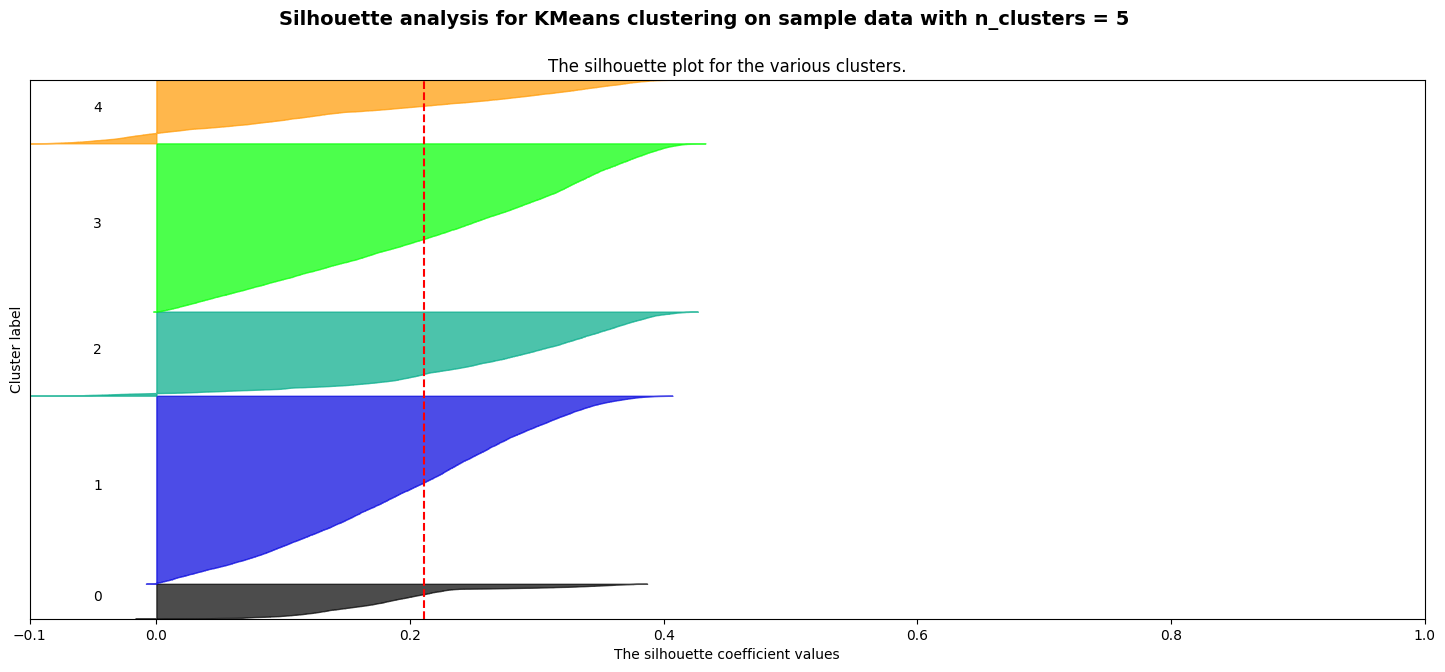

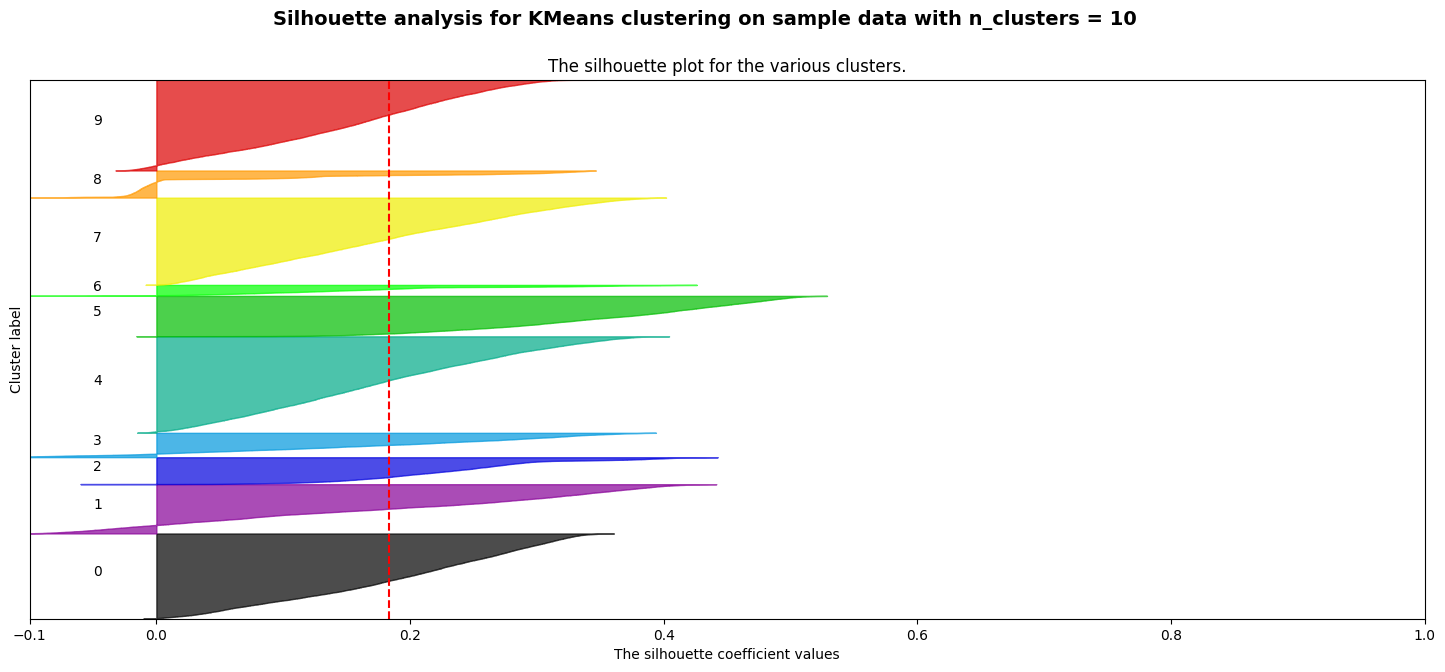

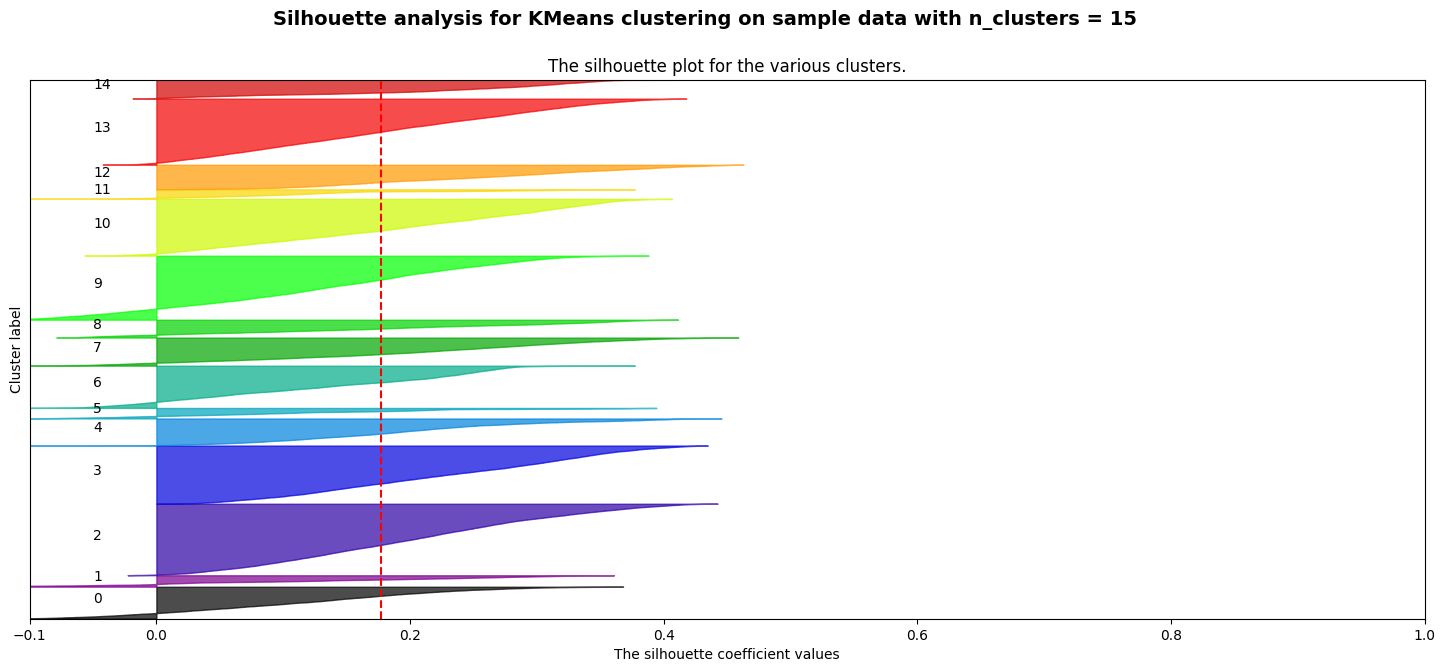

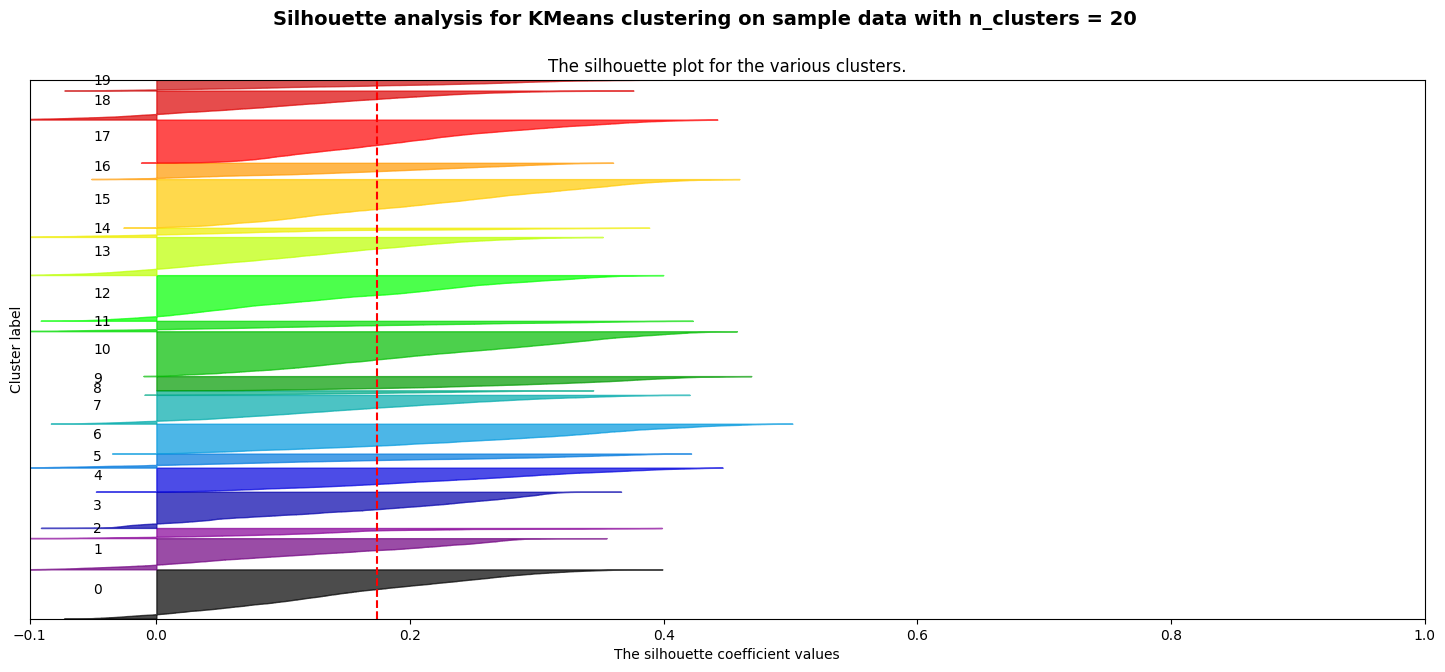

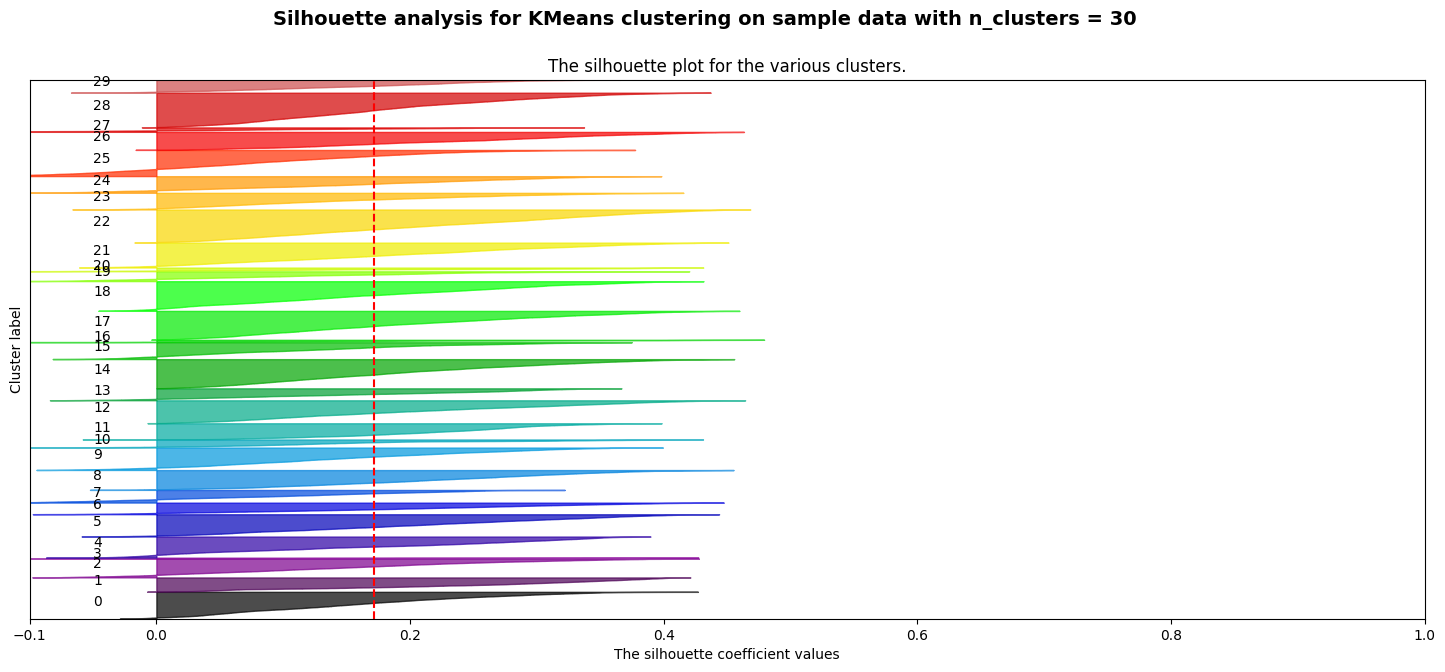

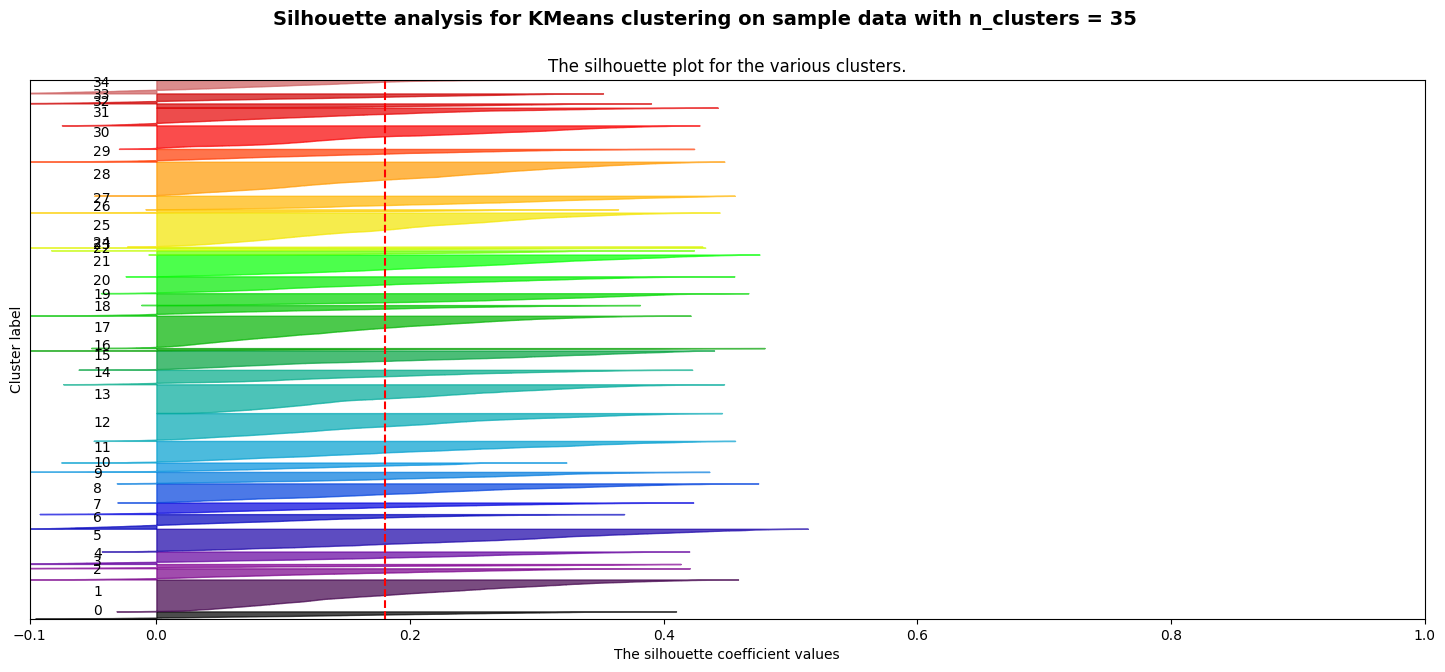

In [145]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tempdata) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(tempdata)

    kmeans_models.append(clusterer)   
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tempdata, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tempdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Liten skilland mellan prototype och normal kmeans

hdbscan gav 0.27 sil score, kollar SHAP (SHapley Additive exPlanations)

In [4]:
tempdata = data.sample(frac=0.4, random_state=42)
#hela datasetet

In [5]:
hdb = HDBSCAN(min_cluster_size=5, n_jobs=-1)
labels = hdb.fit_predict(tempdata)

In [6]:
labels

array([66, 43, 66, ..., 66, 66, 64])

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [9]:
n_clusters_

68

In [8]:
def sil_Score(n_clusters,data,labels):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(data, labels)
    print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, labels)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

For n_clusters = 68 The average silhouette_score is : -0.12829880464935178


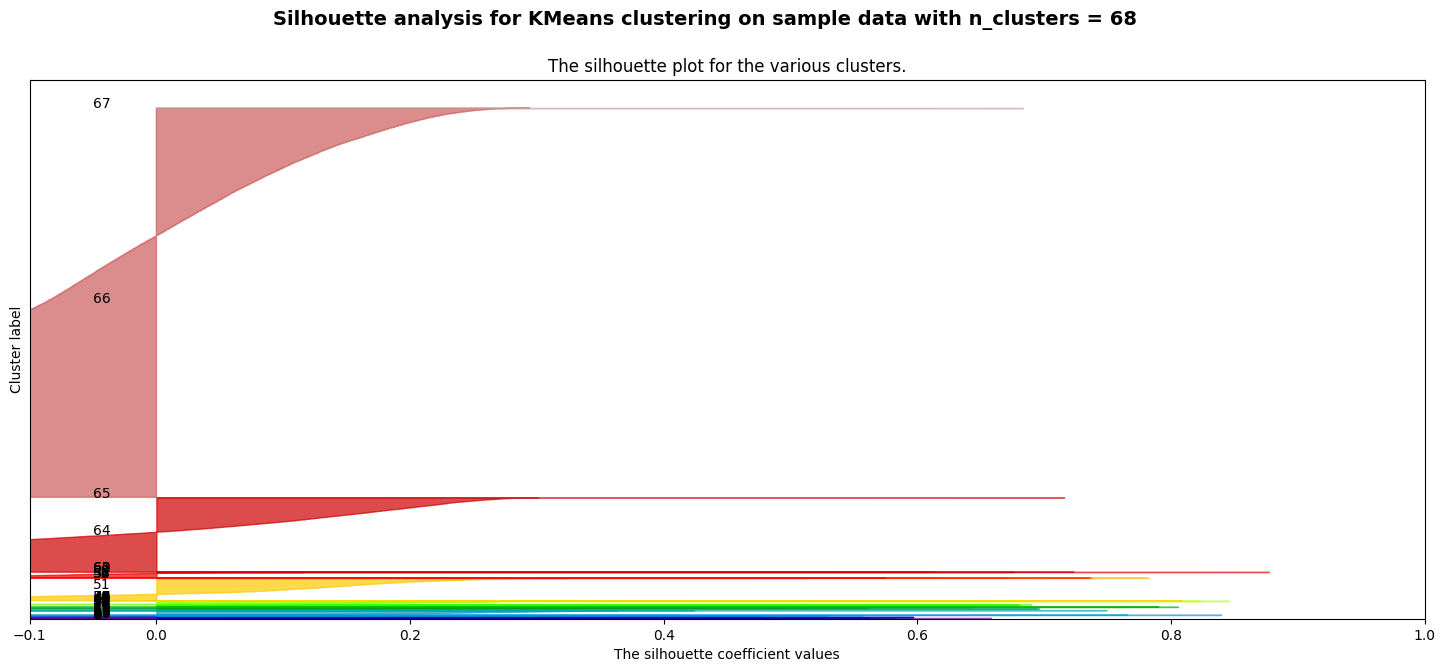

In [10]:
sil_Score(n_clusters_,tempdata,labels)

genom att använda 40% av datasetet så får vi ett negativt sillhuett score, vilket betyder att många datapunkter tränger över till andra kluster

skillnaden från att använda hela datasetet jämnfört med 40% är extremt stort. vi fortsätter med den första hdbscan modellen.

In [6]:
hdb_loaded = joblib.load("hdb_model.pkl")

In [61]:
labels = hdb_loaded.labels_


In [62]:
labels

array([48, 48, 48, ..., 48, 48, 48])

In [10]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

#om en datapunkt är i cluster -1 så anser hdbscan att dem datapunkterna är noise och skall inte tillhöra något kluster

Estimated number of clusters: 52
Estimated number of noise points: 2178


In [11]:
len(labels)

308854

In [12]:
pd.set_option('display.max_columns', 500)

In [78]:
tempdata = data.sample(frac=1, random_state=42)#important use randomstate=42
tempdata["Cluster"] = labels
clustered_data = pd.DataFrame(tempdata)


In [79]:
clustered_data


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster
302051,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,48
59950,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,48
203639,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,48
78768,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,48
216156,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,185.0,84.37,24.54,0.0,30.0,30.0,15.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,48
259178,188.0,81.65,23.11,20.0,15.0,30.0,3.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,48
131932,183.0,88.45,26.45,15.0,8.0,12.0,4.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,48
146867,185.0,181.44,52.77,0.0,8.0,8.0,12.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,48


In [80]:
clustered_data.to_csv("clustered_data.csv",index=False)

Read in saved clustered_data

In [81]:
clustered_data = pd.read_csv("clustered_data.csv")

In [82]:
clustered_data

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster
0,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,48
1,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,48
2,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,48
3,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,48
4,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,185.0,84.37,24.54,0.0,30.0,30.0,15.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,48
308850,188.0,81.65,23.11,20.0,15.0,30.0,3.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,48
308851,183.0,88.45,26.45,15.0,8.0,12.0,4.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,48
308852,185.0,181.44,52.77,0.0,8.0,8.0,12.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,48


In [83]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

In [84]:
clustered_data.groupby("Cluster").describe()

Height_(cm)                                                       \
              count        mean        std    min     25%    50%     75%   
Cluster                                                                    
-1           2178.0  172.138659  20.083886   91.0  160.00  173.0  185.00   
 0              7.0  174.571429   5.623082  168.0  170.50  175.0  177.50   
 1             17.0  172.294118  14.584944  152.0  160.00  173.0  180.00   
 2              5.0  169.800000   3.033150  168.0  168.00  168.0  170.00   
 3             14.0  170.642857  14.637187  152.0  155.50  174.0  180.00   
 4             10.0  175.100000   8.774331  160.0  175.00  176.5  179.50   
 5             19.0  175.473684  10.611149  157.0  170.00  180.0  181.50   
 6              5.0  163.000000   4.415880  157.0  160.00  165.0  165.00   
 7             10.0  173.800000  10.271860  160.0  165.00  174.0  183.00   
 8              5.0  188.000000   6.041523  180.0  185.00  188.0  191.00   
 9             21.0  174.809524   7.665631  157.0  170.00  175.0  180.00   
 10           103.0  174.165049   8.832979  155.0  168.00  175.0  180.00   
 11            18.0  171.111111   8.764158  155.0  165.00  173.0  178.75   
 12            30.0  163.066667   9.776585  150.0  155.00  160.0  169.50   
 13             5.0  153.800000   3.898718  147.0  155.00  155.0  155.00   
 14             6.0  164.666667   4.501851  157.0  163.50  165.0  167.25   
 15            11.0  174.636364   7.658626  163.0  168.00  175.0  181.50   
 16            51.0  165.509804   6.643410  155.0  160.00  165.0  170.00   
 17             6.0  174.000000   2.683282  170.0  173.00  174.0  175.00   
 18            23.0  171.608696  11.761799  147.0  161.50  175.0  180.00   
 19            12.0  161.416667   6.501165  152.0  158.75  160.0  165.00   
 20            51.0  170.764706   9.947036  152.0  164.00  170.0  176.50   
 21            39.0  171.179487   9.588567  157.0  163.00  173.0  180.00   
 22             5.0  180.200000   3.962323  175.0  178.00  180.0  183.00   
 23            19.0  172.789474  11.683697  152.0  163.00  175.0  182.50   
 24            61.0  168.262295   9.870666  150.0  160.00  170.0  175.00   
 25             5.0  166.200000   6.870226  157.0  163.00  165.0  173.00   
 26            34.0  166.794118   7.846170  155.0  160.00  168.0  173.00   
 27           225.0  171.595556   9.802103  147.0  165.00  173.0  178.00   
 28           103.0  169.242718  10.255048  145.0  163.00  170.0  175.00   
 29            13.0  164.615385   7.041999  157.0  157.00  163.0  170.00   
 30             6.0  184.500000   4.183300  178.0  183.50  185.0  185.00   
 31             7.0  180.000000   3.651484  173.0  179.00  180.0  183.00   
 32             7.0  167.285714   3.683942  160.0  166.50  168.0  170.00   
 33             6.0  178.000000   3.464102  175.0  175.00  177.5  180.00   
 34           173.0  167.791908   8.162773  150.0  163.00  168.0  173.00   
 35             5.0  163.800000   2.949576  160.0  163.00  163.0  165.00   
 36            18.0  165.500000   3.451342  160.0  163.00  165.0  168.00   
 37           293.0  168.593857   9.187668  150.0  163.00  168.0  175.00   
 38             9.0  172.333333   5.408327  163.0  170.00  175.0  175.00   
 39            12.0  170.333333   8.689945  160.0  162.25  169.0  178.00   
 40            28.0  171.250000   9.102808  150.0  167.25  173.0  178.00   
 41          2542.0  169.864673  10.043852  140.0  163.00  170.0  178.00   
 42             6.0  171.666667   2.943920  168.0  169.25  173.0  173.00   
 43           102.0  169.852941  10.545889  152.0  163.00  170.0  178.00   
 44             7.0  162.428571   4.391550  157.0  158.50  165.0  165.00   
 45            30.0  169.466667   5.757953  160.0  165.00  169.0  174.50   
 46           209.0  169.133971   9.577681  147.0  163.00  170.0  175.00   
 47            13.0  167.846154   5.814438  160.0  163.00  170.0  173.00   
 48        301591.0  170.622174  10.562761  115.0  163.0

In [85]:
clustered_data[clustered_data['Cluster'] == 48].describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster
count,301591.000000,301591.000000,301591.000000,301591.00000,301591.000000,301591.000000,301591.000000,301591.0
mean,170.622174,83.508563,28.592214,5.07913,28.722462,14.338558,5.948447,48.0
std,10.562761,21.023899,6.383559,8.18246,23.072960,12.840609,6.796086,0.0
min,115.000000,24.950000,12.020000,0.00000,0.000000,0.000000,0.000000,48.0
25%,163.000000,68.040000,24.210000,0.00000,12.000000,4.000000,2.000000,48.0
50%,170.000000,81.650000,27.440000,1.00000,30.000000,12.000000,4.000000,48.0
75%,178.000000,95.250000,31.800000,6.00000,30.000000,20.000000,8.000000,48.0
max,218.000000,238.140000,89.100000,30.00000,104.000000,100.000000,68.000000,48.0


In [86]:
clustered_data[clustered_data['Cluster'] == 48].info()

<class 'pandas.core.frame.DataFrame'>
Index: 301591 entries, 0 to 308853
Data columns (total 39 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          301591 non-null  float64
 1   Weight_(kg)                                          301591 non-null  float64
 2   BMI                                                  301591 non-null  float64
 3   Alcohol_Consumption                                  301591 non-null  float64
 4   Fruit_Consumption                                    301591 non-null  float64
 5   Green_Vegetables_Consumption                         301591 non-null  float64
 6   FriedPotato_Consumption                              301591 non-null  float64
 7   General_Health_Fair                                  301591 non-null  bool   
 8   General_Health_Good                                  301591

In [87]:
clustered_data[clustered_data['Cluster'] == 48].describe(include="bool")

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,266621,208280,290567,193629,288509,265281,284529,233768,233555,277144,272169,272333,241146,294851,262354,299034,202722,156326,286483,283670,281565,280602,281191,277168,274157,269909,268861,271095,281263,279716,179064


In [89]:
1-(179064/301591)

0.40626875470421864

In [90]:
1-(202722/301591)

0.3278247693067764

notera när alla general health är = false så är det samma som general health excelent = True
- vi kan notera att freq minskar ju bättre hälsan är ända tills vi når exelent vilket betyder att detta klusteret har väldigt friska människor i sig
- det är nog därför detta klusteret är så stort då majoriteten är friska i datasetet
- datan säger också att en stor majoritet tränar och har gjort en checkup inom ett år.
- notera att vi också har ca hälften män och kvinnor vilket är bra då modellen inte separerar friska patienter beroende på kön
- notera att alla age groups är i majoritetet false vilket betyder att detta klustret består i störts del av 19-24 åringar, vilket ofta är hälsosamma
- nästan hälften (41%) av dem röker dock vilket kan betyda att rökning inte ses som ohälsosamt hos modellen, vilket det kan vara då rökning ofta har en längre negativ påverkan
- ca 33% har dock arthritis


In [91]:
clustered_data[clustered_data['Cluster'] == 41].describe(include="bool")

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542,2542
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,2314,1860,2465,1579,2446,2228,2415,1998,2180,2355,2290,2301,2048,2490,2287,2511,1716,1521,2442,2403,2374,2349,2355,2314,2314,2236,2260,2297,2386,2385,1673


In [92]:
#continuous_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI']  # Add more continuous columns as needed
correlations = clustered_data.drop("Cluster", axis=1).corrwith(clustered_data['Cluster']==48)
# Display correlations
print(correlations)

Height_(cm)                                            0.004187
Weight_(kg)                                           -0.024181
BMI                                                   -0.033588
Alcohol_Consumption                                   -0.013545
Fruit_Consumption                                     -0.288250
Green_Vegetables_Consumption                          -0.333237
FriedPotato_Consumption                               -0.261400
General_Health_Fair                                    0.000141
General_Health_Good                                    0.008768
General_Health_Poor                                   -0.004608
General_Health_Very Good                               0.007269
Checkup_5 or more years ago                           -0.002452
Checkup_Within the past 2 years                       -0.001831
Checkup_Within the past 5 years                        0.002792
Checkup_Within the past year                           0.001332
Exercise_Yes                            

In [93]:
spearman_corr = clustered_data.drop("Cluster", axis=1).corrwith(clustered_data['Cluster']==2, method='spearman')
print(spearman_corr)

Height_(cm)                                           -0.000310
Weight_(kg)                                            0.000632
BMI                                                    0.001315
Alcohol_Consumption                                   -0.001039
Fruit_Consumption                                      0.007007
Green_Vegetables_Consumption                           0.006930
FriedPotato_Consumption                                0.007012
General_Health_Fair                                   -0.001457
General_Health_Good                                   -0.002689
General_Health_Poor                                   -0.000785
General_Health_Very Good                               0.003716
Checkup_5 or more years ago                           -0.000858
Checkup_Within the past 2 years                       -0.001489
Checkup_Within the past 5 years                       -0.000984
Checkup_Within the past year                           0.002168
Exercise_Yes                            

In [17]:
colors = px.colors.sequential.Magma

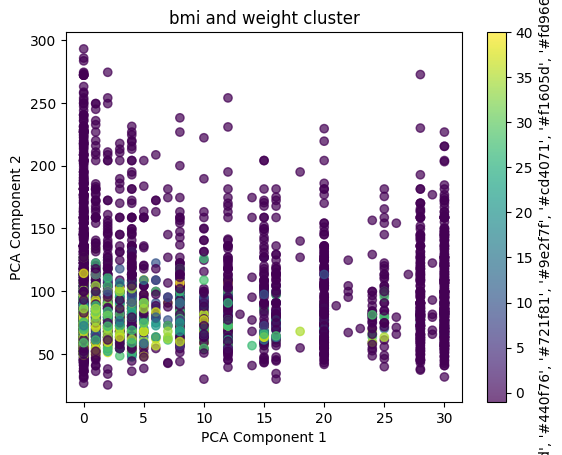

In [94]:
# 1. Visualize the clusters in the 2D PCA space
plt.scatter(clustered_data.loc[clustered_data["Cluster"] < 41, "Alcohol_Consumption"], clustered_data.loc[clustered_data["Cluster"] < 41, "Weight_(kg)"], c=clustered_data.loc[clustered_data["Cluster"] < 41, "Cluster"], cmap='viridis', alpha=0.7)
plt.title("bmi and weight cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label=colors)
plt.show()

In [95]:
clustered_data.loc[clustered_data["Cluster"] == 41, "BMI"]

5         27.46
67        27.37
135       25.83
181       30.92
253       34.57
          ...  
307997    30.86
308441    32.28
308501    25.02
308603    25.09
308736    25.69
Name: BMI, Length: 2542, dtype: float64

In [96]:

clustered_data.loc[clustered_data["Cluster"] == 41, "Cluster"]

5         41
67        41
135       41
181       41
253       41
          ..
307997    41
308441    41
308501    41
308603    41
308736    41
Name: Cluster, Length: 2542, dtype: int64

In [97]:
categorical_columns = data.select_dtypes(include=['bool']).columns.tolist()
numerical_columns = clustered_data.drop(categorical_columns, axis=1).columns.tolist()

In [98]:
numerical_columns[:-1]
#categorical_columns

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

In [100]:
# Select features and labels
X_continuous = clustered_data[numerical_columns[:-1]]  # Add more continuous features
y = clustered_data['Cluster']  # Cluster labels

# Perform ANOVA F-test
f_values, p_values = f_classif(X_continuous, y)

# Display F-values and p-values
for feature, f_val, p_val in zip(X_continuous.columns, f_values, p_values):
    print(f"Feature: {feature}, F-value: {f_val}, P-value: {p_val}")

Feature: Height_(cm), F-value: 15.142680079944155, P-value: 8.358356845560065e-132
Feature: Weight_(kg), F-value: 56.62951043318349, P-value: 0.0
Feature: BMI, F-value: 72.64883642932162, P-value: 0.0
Feature: Alcohol_Consumption, F-value: 24.56447038255794, P-value: 1.29812998733359e-232
Feature: Fruit_Consumption, F-value: 977.0703201191789, P-value: 0.0
Feature: Green_Vegetables_Consumption, F-value: 1714.3228363265507, P-value: 0.0
Feature: FriedPotato_Consumption, F-value: 2375.222545755652, P-value: 0.0


In [101]:
clustered_data.loc[clustered_data["Cluster"] == 41, "Cluster"]

5         41
67        41
135       41
181       41
253       41
          ..
307997    41
308441    41
308501    41
308603    41
308736    41
Name: Cluster, Length: 2542, dtype: int64

In [102]:
df = clustered_data.copy()

In [103]:
temp = sorted(clustered_data["Cluster"].unique().tolist())
temp

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [104]:
specific_cluster = 41

df['Is_In_Specific_Cluster'] = (df['Cluster'] == specific_cluster).astype(int)

results = []

for feature in categorical_columns:
    # Create a contingency table between the feature and the specific cluster membership
    contingency_table = pd.crosstab(df[feature], df['Is_In_Specific_Cluster'])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the result for this feature
    results.append({'Feature': feature, 'Chi-Square': chi2, 'P-value': p})

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                                              Feature  Chi-Square  \
0                                 General_Health_Fair   16.975129   
1                                 General_Health_Good   19.482390   
2                                 General_Health_Poor    2.787317   
3                            General_Health_Very Good    5.017780   
4                         Checkup_5 or more years ago    1.859864   
5                     Checkup_Within the past 2 years    0.195184   
6                     Checkup_Within the past 5 years    1.918854   
7                        Checkup_Within the past year    1.704781   
8                                        Exercise_Yes   99.660088   
9                                   Heart_Disease_Yes    1.733601   
10                                    Skin_Cancer_Yes    0.097252   
11                                   Other_Cancer_Yes    0.088230   
12                                     Depression_Yes    0.554811   
13   Diabetes_No, pre-diabetes or 

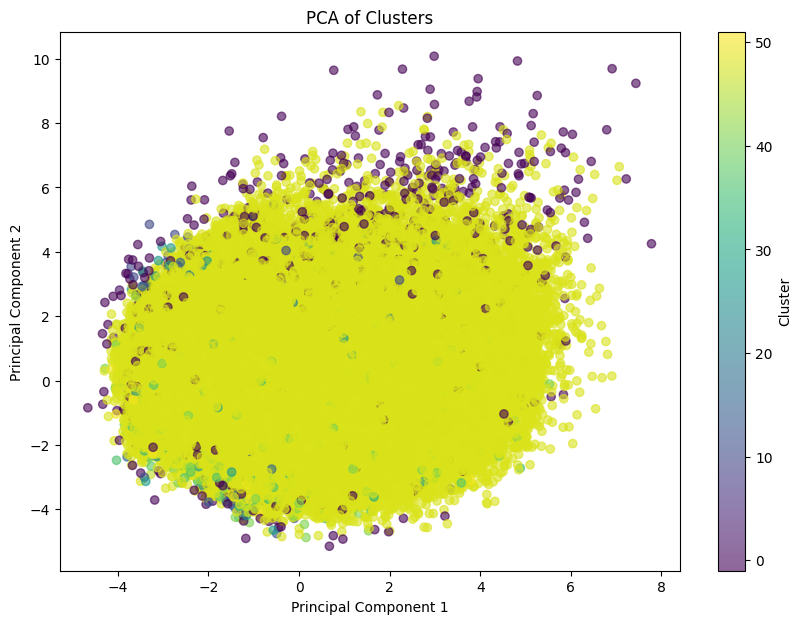

In [105]:
# Assuming `df` is your DataFrame, with a 'Cluster' column representing cluster assignments.

# Step 1: Separate features and cluster labels
features = clustered_data.drop(columns=['Cluster'])
clusters = clustered_data['Cluster']

# Step 2: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply PCA to reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Step 4: Plot the PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.show()

In [106]:
def plot_3d_pca(highlight_label,specifik_cluster = None):
    
    highlight_cluster = highlight_label  # Specify the cluster you want to highlight
    
    if specifik_cluster == None:
        features = clustered_data.drop(columns=['Cluster'])
        clusters = clustered_data['Cluster']
        highlight_color = 'green'  # Color for the highlighted cluster
        neutral_color = 'grey'  # Color for all other clusters
        colors = [highlight_color if cluster == highlight_cluster else neutral_color for cluster in clusters]
        
    else:
        df_cluster = clustered_data[clustered_data['Cluster'] == specifik_cluster]
        features = df_cluster.drop(columns=['Cluster'])
        colors='red'
    

    # Step 2: Standardize the data
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Step 3: Apply PCA to reduce to 3 components for 3D visualization
    pca = PCA(n_components=3)
    features_pca = pca.fit_transform(features_scaled)

    # Create a color list based on the clusters

    # Step 4: Plot the PCA results in 3D with custom colors
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], 
                        c=colors, alpha=0.6)

    # Adding labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title(f'3D PCA of Clusters with Cluster {highlight_cluster} Highlighted')
    plt.show()

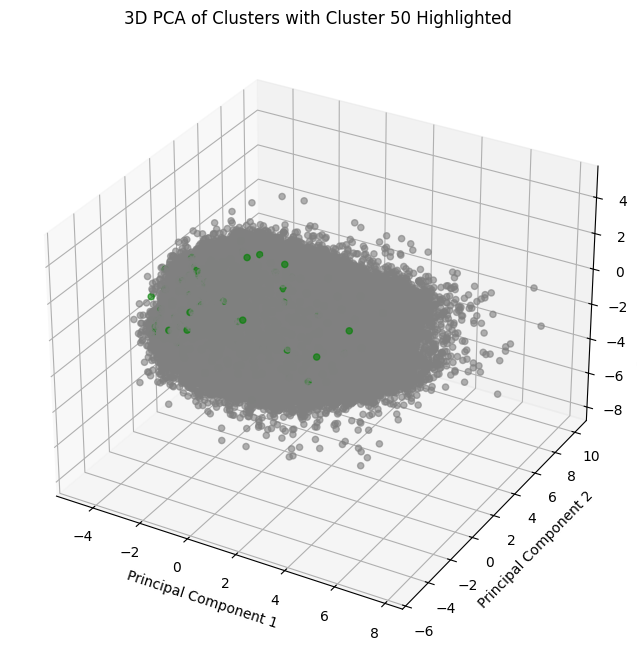

In [107]:
plot_3d_pca(highlight_label = 50,specifik_cluster = None)

In [108]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

https://en.wikipedia.org/wiki/Chi-squared_test

https://en.wikipedia.org/wiki/Contingency_table

In [109]:
categorical_features = clustered_data.select_dtypes(include=['bool']).columns.tolist()
numerical_features = clustered_data.drop(categorical_columns, axis=1).columns.tolist()

In [110]:
print(len(categorical_features))
print(len(numerical_features))

31
8


In [111]:
results = []

# Chi-Square Test for Categorical Features
for feature in categorical_features:
    contingency_table = pd.crosstab(clustered_data[feature], clustered_data['Cluster'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results.append({'Feature': feature, 'Test': 'Chi-Square', 'Chi-Square': chi2, 'P-value': p})

# ANOVA for Numerical Features
for feature in numerical_features:
    f_stat, p = f_oneway(*[group[feature].values for name, group in clustered_data.groupby('Cluster')])
    results.append({'Feature': feature, 'Test': 'ANOVA', 'F-Statistic': f_stat, 'P-value': p})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv("anova_chi_square_results.csv", index=False)

# Display results
print(results_df)

                                              Feature        Test  Chi-Square  \
0                                 General_Health_Fair  Chi-Square  143.938260   
1                                 General_Health_Good  Chi-Square  106.745855   
2                                 General_Health_Poor  Chi-Square  125.818755   
3                            General_Health_Very Good  Chi-Square  142.945140   
4                         Checkup_5 or more years ago  Chi-Square   71.900288   
5                     Checkup_Within the past 2 years  Chi-Square   59.720090   
6                     Checkup_Within the past 5 years  Chi-Square   38.735588   
7                        Checkup_Within the past year  Chi-Square   61.027831   
8                                        Exercise_Yes  Chi-Square  254.445244   
9                                   Heart_Disease_Yes  Chi-Square   56.234903   
10                                    Skin_Cancer_Yes  Chi-Square   74.276788   
11                          

c:\Users\serig\OneDrive\vikrigt\skola\ds23_projektkurs-main\git\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [112]:

# Assuming df is your DataFrame and has a 'Cluster' column indicating cluster assignments

# Initialize an empty dictionary to store results
def hypotestest (p_threshold):
    significant_features = {}

    # Loop over each unique cluster
    for cluster in clustered_data['Cluster'].unique():
        # Filter the data for the current cluster
        df_cluster = clustered_data[clustered_data['Cluster'] == cluster]
        
        # Initialize a list to store significant features for this cluster
        significant_features[cluster] = []
        
        # Loop over each feature (excluding the 'Cluster' column)
        for feature in clustered_data.drop(columns=['Cluster']).columns:
            if clustered_data[feature].dtype == 'object' or clustered_data[feature].nunique() < 10:  # Categorical features
                # Create a contingency table for the feature and cluster assignment
                contingency_table = pd.crosstab(clustered_data[feature], clustered_data['Cluster'] == cluster)
                
                # Perform the Chi-square test
                chi2, p, _, _ = chi2_contingency(contingency_table)
                
                # Check if the p-value is below 0.10
                test_type = "Chi-Squared"
                if p < p_threshold:
                    significant_features[cluster].append((feature, chi2, p, test_type))
            
            else:  # Numerical features
                # Perform ANOVA test for numerical features against cluster
                f_stat, p = f_oneway(*[group[feature].values for name, group in clustered_data.groupby('Cluster')])
                
                test_type = "ANOVA, F-test"
                
                # Check if the p-value is below 0.10
                if p < p_threshold:
                    significant_features[cluster].append((feature, f_stat, p, test_type))
                    
    return significant_features




In [113]:
# Convert results to a DataFrame for easier viewing
significant_features = hypotestest(0.05)

significant_df_temp = pd.DataFrame([
    {"Cluster": cluster, "Feature": feature, "Statistic": stat, "P-value": p, "Test type": test_type}
    for cluster, features in significant_features.items() for feature, stat, p, test_type in features
])

# Display the results
print(significant_df_temp)

# Optional: Save the results to a CSV file
#significant_df.to_csv("significant_features_results.csv", index=False)

     Cluster                       Feature    Statistic        P-value  \
0         48                   Height_(cm)    15.142680  8.358357e-132   
1         48                   Weight_(kg)    56.629510   0.000000e+00   
2         48                           BMI    72.648836   0.000000e+00   
3         48           Alcohol_Consumption    24.564470  1.298130e-232   
4         48             Fruit_Consumption   977.070320   0.000000e+00   
..       ...                           ...          ...            ...   
503       17           Alcohol_Consumption    24.564470  1.298130e-232   
504       17             Fruit_Consumption   977.070320   0.000000e+00   
505       17  Green_Vegetables_Consumption  1714.322836   0.000000e+00   
506       17       FriedPotato_Consumption  2375.222546   0.000000e+00   
507       17            Age_Category_65-69    14.028739   1.800378e-04   

         Test type  
0    ANOVA, F-test  
1    ANOVA, F-test  
2    ANOVA, F-test  
3    ANOVA, F-test  
4    A

In [117]:
significant_df_temp.to_csv("significant_features_results.csv")

In [120]:
significant_df = pd.read_csv("significant_features_results.csv")

In [121]:
clustered_data = pd.read_csv("clustered_data.csv")
pd.set_option('display.max_columns', 500)

In [122]:
grouped_significant_df = significant_df_temp.groupby("Cluster")
for cluster, data in grouped_significant_df:
    print(f"Cluster {cluster} - Significant Features (p < 0.05):")
    print(data[["Feature", "Statistic", "P-value", "Test type"]])   
    print("\n" + "="*50 + "\n")

Cluster -1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
90                    Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
91                    Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
92                            BMI    72.648836   0.000000e+00  ANOVA, F-test
93            Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
94              Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
95   Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
96        FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
97            General_Health_Fair    58.598155   1.933977e-14    Chi-Squared
98            General_Health_Poor    56.295972   6.234300e-14    Chi-Squared
99       General_Health_Very Good    64.501253   9.647099e-16    Chi-Squared
100   Checkup_5 or more years ago    13.516137   2.365207e-04    Chi-Squared
101  Checkup_Within the past y

ex cluster 0: In sum, Cluster 0 is notably defined by unique physical, dietary, and demographic patterns, with significant variations in both consumption and demographic characteristics.

In [137]:
clustered_data[clustered_data["Cluster"] == 0].describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.0,7.0,7.000000
mean,174.571429,82.100000,27.138571,7.0,15.142857,120.0,120.0,0.0,0.434683
std,5.623082,12.467619,5.097736,9.0,11.246163,0.0,0.0,0.0,0.085580
min,168.000000,66.680000,20.500000,0.0,2.000000,120.0,120.0,0.0,0.342158
25%,170.500000,73.705000,23.395000,2.0,8.000000,120.0,120.0,0.0,0.373023
50%,175.000000,81.650000,26.580000,2.0,12.000000,120.0,120.0,0.0,0.379338
75%,177.500000,87.315000,31.070000,9.5,23.000000,120.0,120.0,0.0,0.521717
max,183.000000,104.330000,33.960000,24.0,30.000000,120.0,120.0,0.0,0.531806


In [139]:
clustered_data[clustered_data["Cluster"] == 0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
96198,180.0,66.68,20.50,0.0,2.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,0,0.342158
158699,173.0,74.84,25.09,24.0,30.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.379338
186359,168.0,88.45,31.47,2.0,12.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.514334
209645,175.0,104.33,33.96,2.0,4.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,0,0.369522
263151,175.0,81.65,26.58,15.0,12.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,0,0.531806
270708,168.0,86.18,30.67,2.0,16.0,120.0,120.0,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0.529099
286101,183.0,72.57,21.70,4.0,30.0,120.0,120.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,0,0.376524


In [138]:
clustered_data[clustered_data["Cluster"] == 0].describe(include="bool")

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,2,1,2,2,1,2,1,2,2,1,1,2,2,2,1,1,2,1,1,2,2,2,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,6,7,6,4,7,6,7,6,5,7,7,6,5,6,7,7,6,7,7,6,5,4,7,7,7,7,7,7,7,6,4


Om vi kollar igenom datapunkterna för cluster 0 kan vi se att dem signifikanta pberoende variablerna framstår, 
- vi kan se att alla patienter har en speciell diet.
- dem äter väldigt mycket och majoriteten tränar.
- samt att deras hälsa är very good eller excellent.
- detta klustret innehåller oxå bara män
- en motgående faktor är att det finns en patient som är sjuk (cancer och Arthritis) 

In [130]:
def plot_2d(feature_1,feature_2,cluster_nr):
    plt.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1], clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2], c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"], cmap='viridis', alpha=0.7)
    plt.title(f'{feature_1} and {feature_2} with Cluster {cluster_nr}')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.colorbar(label=colors)
    plt.show()

In [131]:
def plot_3d(feature_1, feature_2, feature_3, cluster_nr):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_3], 
                         c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"],
                         alpha=0.7, cmap='viridis')

    # Adding labels and title
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_zlabel(feature_3)
    plt.title(f'{feature_1} and {feature_2} and {feature_3} with Cluster {cluster_nr}')
    plt.show()

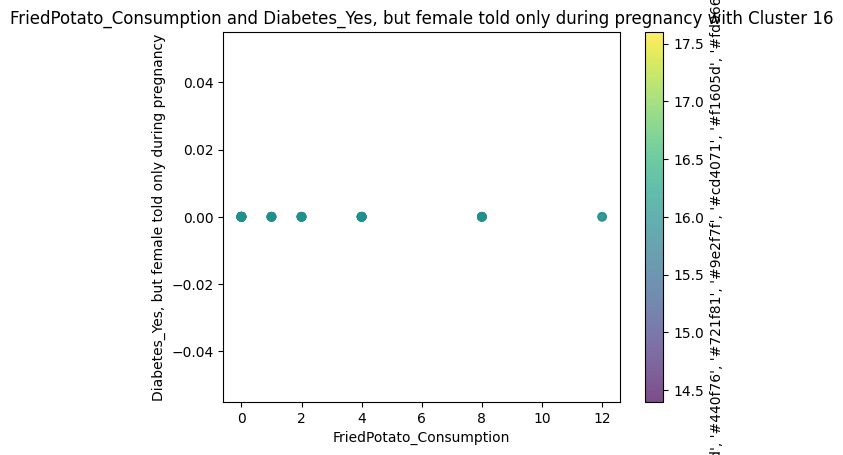

In [132]:
plot_2d("FriedPotato_Consumption","Diabetes_Yes, but female told only during pregnancy",16)

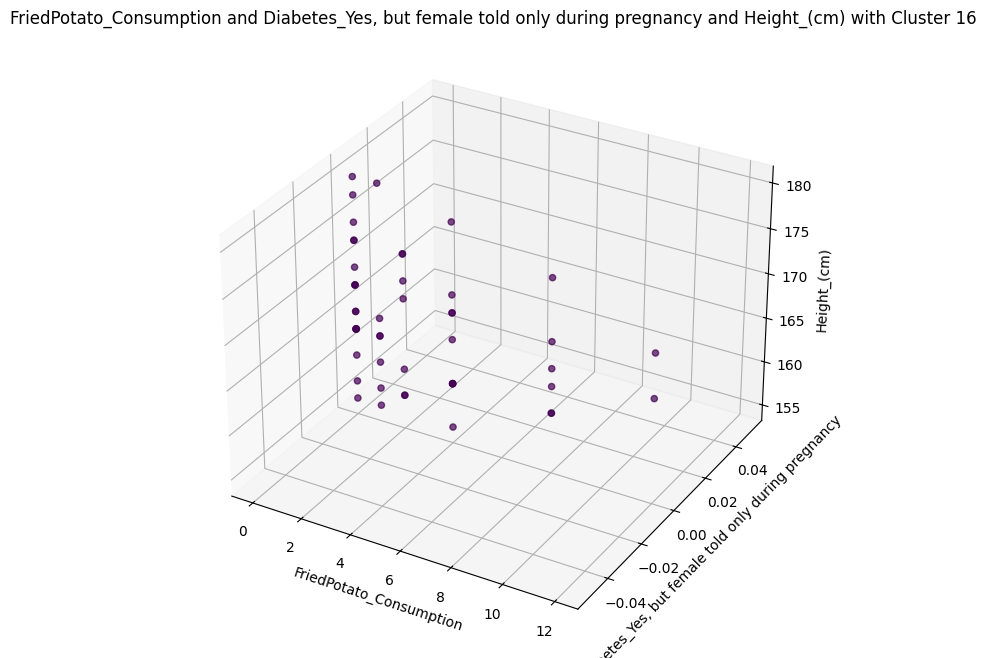

In [133]:
plot_3d("FriedPotato_Consumption","Diabetes_Yes, but female told only during pregnancy","Height_(cm)",16)

In [136]:
X = clustered_data.drop(columns=['Cluster'])

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X, clustered_data['Cluster'])

# Calculate overall silhouette score for all clusters
overall_silhouette_score = silhouette_score(X, clustered_data['Cluster'])


AttributeError: 'DataFrame' object has no attribute 'append'

In [172]:
silhouette_vals

array([ 0.44275789, -0.28210191,  0.38993824, ...,  0.46442952,
        0.12639573,  0.49327297])

In [148]:
clustered_data['Silhouette'] = silhouette_vals


silhouette_df = clustered_data.groupby('Cluster')['Silhouette'].mean().reset_index()
silhouette_df.columns = ['Cluster', 'Average_Silhouette']

overall_silhouette_df = pd.DataFrame({'Cluster': ['Overall'], 'Average_Silhouette': [overall_silhouette_score]})
silhouette_df = pd.concat([silhouette_df, overall_silhouette_df], ignore_index=True)

# Display the results
print(silhouette_df)

    Cluster  Average_Silhouette
0        -1           -0.537178
1         0            0.434683
2         1            0.193146
3         2            0.679306
4         3            0.050507
5         4            0.394982
6         5            0.202073
7         6            0.618495
8         7            0.414376
9         8            0.558063
10        9            0.267339
11       10            0.204461
12       11            0.432789
13       12            0.210967
14       13            0.645083
15       14            0.348886
16       15            0.415140
17       16            0.312155
18       17            0.650901
19       18            0.250754
20       19            0.401537
21       20            0.248741
22       21            0.185517
23       22            0.471738
24       23            0.352435
25       24            0.078206
26       25            0.634193
27       26            0.411958
28       27            0.167879
29       28            0.224584
30      

In [156]:
#silhouette_df[silhouette_df["Average_Silhouette"] > 0.4]
silhouette_df["Average_Silhouette"].sort_values(ascending=False).head(5)


50    0.825404
43    0.807259
34    0.778048
31    0.758110
45    0.692212
Name: Average_Silhouette, dtype: float64

In [174]:
clustered_data.to_csv("clustered_data.csv",index=False)

In [176]:
silhouette_df.to_csv("silhouette_df.csv",index=False)